In [369]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [370]:
deliveries = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Data Science/Data Analysis/IPL_Data_Analysis/deliveries.csv")
matches = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/Data Science/Data Analysis/IPL_Data_Analysis/matches.csv")

In [371]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [372]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,11415,2019,Hyderabad,12/05/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong
1,11414,2019,Visakhapatnam,10/05/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
2,11413,2019,Visakhapatnam,08/05/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
3,11412,2019,Chennai,07/05/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
4,11346,2019,Mohali,05/05/2019,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,IS Bindra Stadium,KN Ananthapadmanabhan,C Shamshuddin,Bruce Oxenford


##**Most Runs**

In [373]:
batsman_runs = deliveries.groupby(deliveries.batsman).batsman_runs.sum()
most_runs = batsman_runs.sort_values(ascending=False).head(10)
most_runs

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

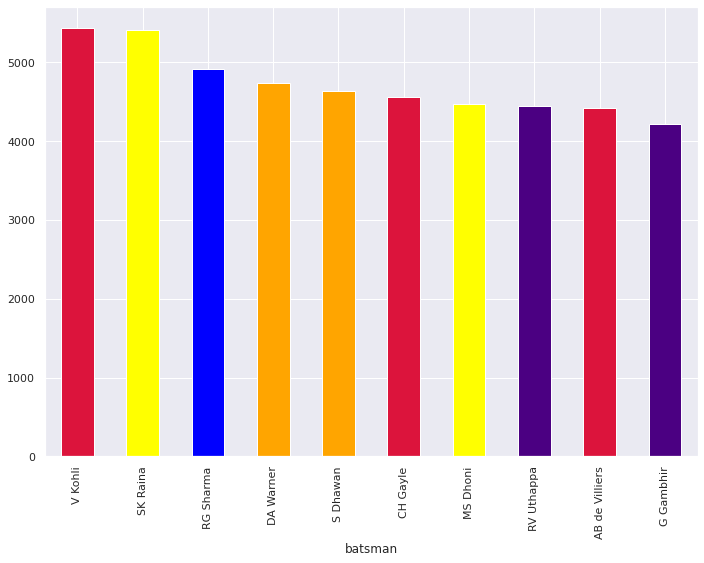

In [374]:
most_runs.plot(kind='bar',color=['crimson','yellow','blue','orange','orange','crimson','yellow','indigo','crimson','indigo'])

##**Most Wickets**

In [375]:
bowler_wickets = deliveries.groupby(deliveries.bowler).player_dismissed.count()
most_wickets = bowler_wickets.sort_values(ascending=False).head(10)
most_wickets

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
Name: player_dismissed, dtype: int64

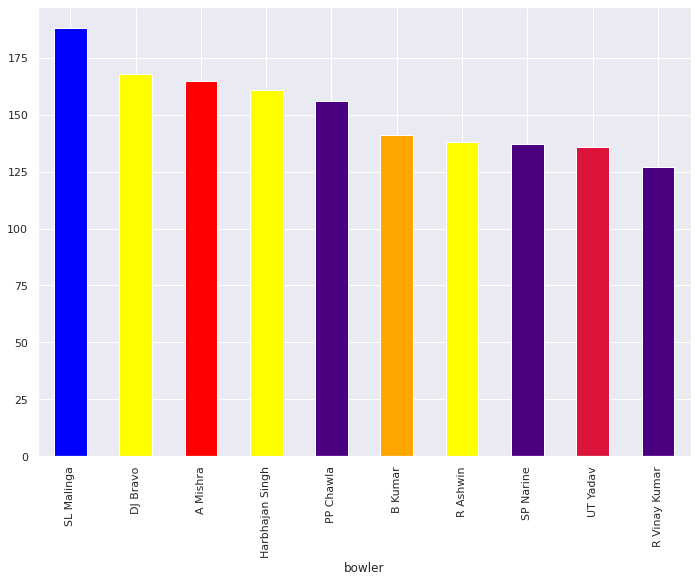

In [376]:
most_wickets.plot(kind='bar',color=['blue','yellow','red','yellow','indigo','orange','yellow','indigo','crimson','indigo'])

##**Most Catches**

In [377]:
deliveries.head()
catches = deliveries.fielder.value_counts()
most_catches = catches.head(10)
most_catches

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64

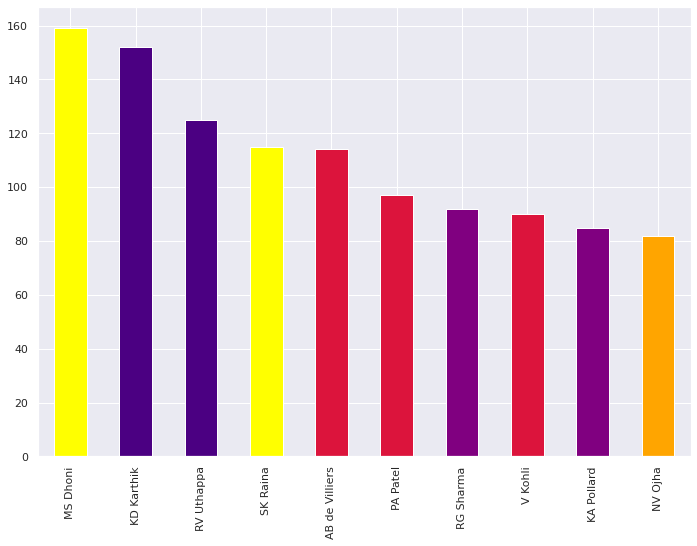

In [378]:
most_catches.plot(kind='bar',color=['yellow','indigo','indigo','yellow','crimson','crimson','purple','crimson','purple','orange'])

##**Most Man of the Match Award**

In [379]:
man_of_match = matches["player_of_match"].value_counts().head(10)
man_of_match

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

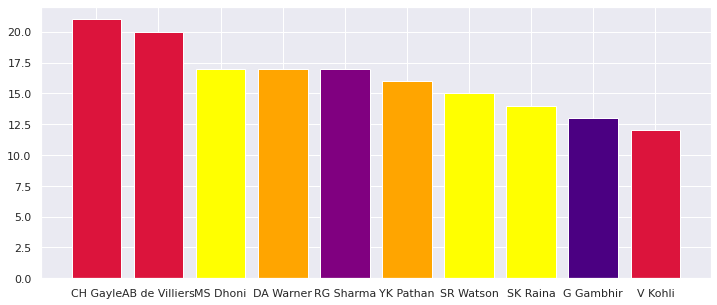

In [398]:
plt.figure(figsize=(12,5))
plt.bar(list(man_of_match.keys()),list(man_of_match),color=['crimson','crimson','yellow','orange','purple','orange','yellow','yellow','indigo','crimson'])
plt.show()

##**Match Results**

In [381]:
match_results = matches['result'].value_counts()
match_results

normal       743
tie            9
no result      4
Name: result, dtype: int64

##**Matches Won**

In [382]:
match_wins = matches["winner"].value_counts().head(10)
match_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Name: winner, dtype: int64

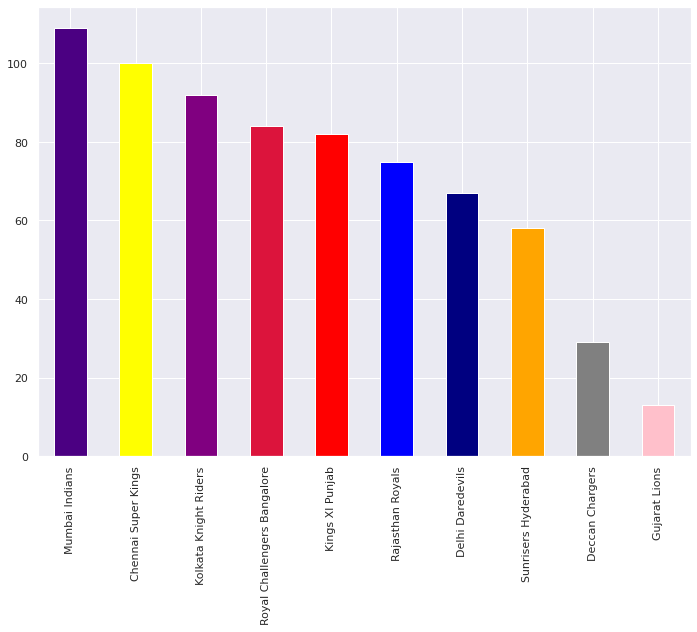

In [400]:
match_wins.plot(kind='bar',color=['indigo','yellow','purple','crimson','red','blue','navy','orange','grey','pink'])

##**Most Toss Wins**

In [384]:
most_toss_wins = matches["toss_winner"].value_counts().head(10)
most_toss_wins

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Name: toss_winner, dtype: int64

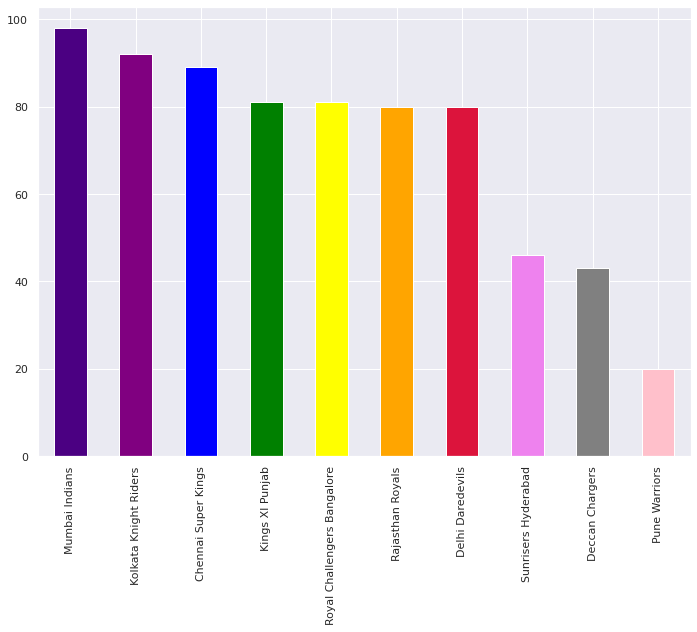

In [385]:
most_toss_wins.plot(kind='bar',color=["indigo","purple","blue","green","yellow","orange",'crimson',"violet","grey","pink"])

##**Most wins Batting First**

In [386]:
batting_first = matches[matches["win_by_runs"] != 0]
batting_first['win_by_runs'].value_counts().head(10)

14    13
10    11
4     11
1     10
13     9
23     9
7      9
9      9
22     9
15     9
Name: win_by_runs, dtype: int64

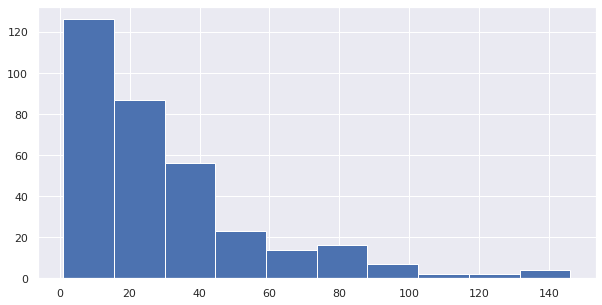

In [387]:
plt.figure(figsize=(10,5))
plt.hist(batting_first['win_by_runs'])
plt.show()

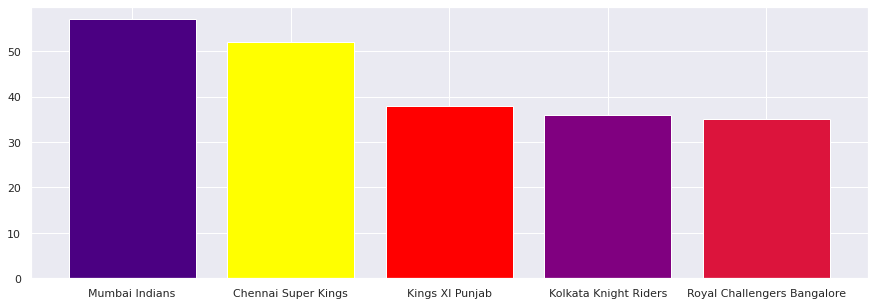

In [403]:
plt.figure(figsize=(15,5))
plt.bar(list(batting_first['winner'].value_counts()[:5].keys()),list(batting_first['winner'].value_counts()[:5]),color=["indigo","yellow","red",'purple',"crimson"])
plt.show()

##**Most wins Batting Second**

In [389]:
batting_second = matches[matches['win_by_wickets'] != 0]
batting_second['win_by_wickets'].value_counts()

6     85
7     80
5     71
8     54
4     41
9     37
3     18
10    11
2      6
1      3
Name: win_by_wickets, dtype: int64

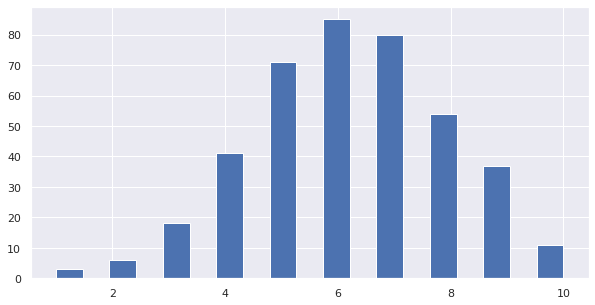

In [390]:
plt.figure(figsize=(10,5))
plt.hist(batting_second['win_by_wickets'],bins=19)
plt.show()

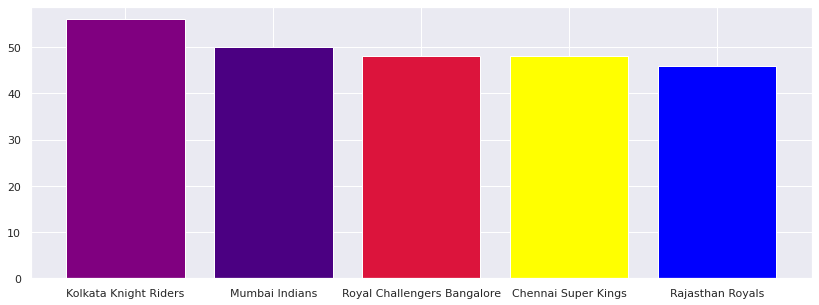

In [404]:
plt.figure(figsize=(14,5))
plt.bar(list(batting_second['winner'].value_counts()[:5].keys()),list(batting_second['winner'].value_counts()[:5]),color=['purple','indigo','crimson','yellow','blue',])
plt.show()

##**No. of Matches Played**

In [392]:
no_of_matches = matches['season'].value_counts()
no_of_matches

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

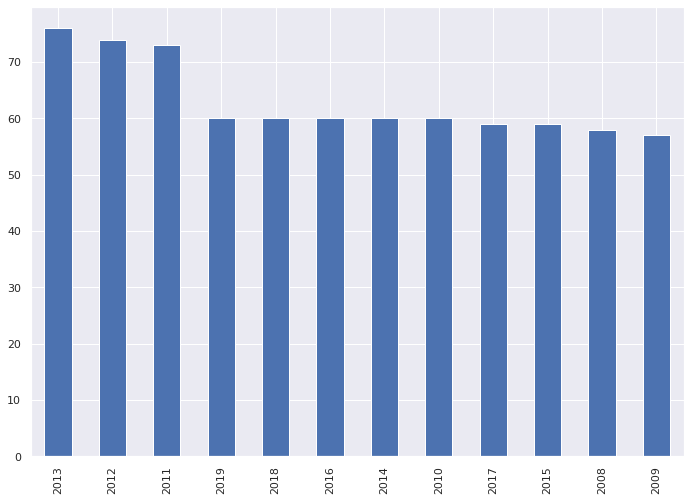

In [393]:
no_of_matches.plot(kind='bar')

##**Popular Venues**

In [394]:
venues = matches['city'].value_counts().head(10)
venues

Mumbai        101
Kolkata        77
Delhi          74
Bangalore      66
Hyderabad      64
Chennai        57
Jaipur         47
Chandigarh     46
Pune           38
Durban         15
Name: city, dtype: int64

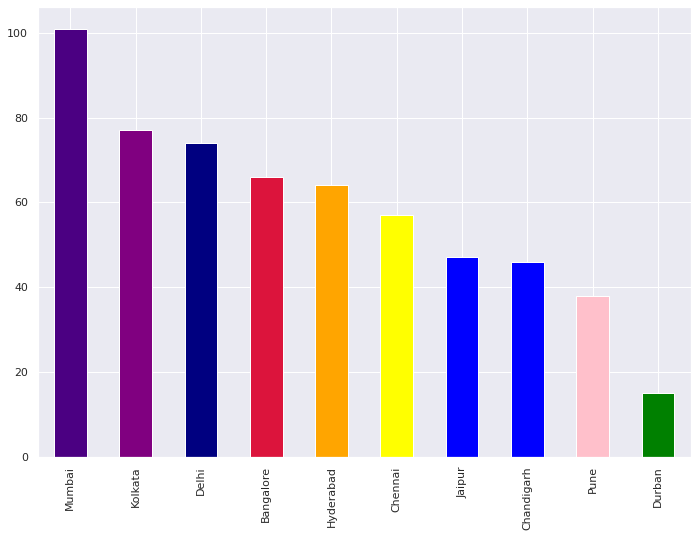

In [405]:
venues.plot(kind='bar',color=['indigo','purple','navy','crimson','orange','yellow','blue','blue','pink','green'])

##**% Wins by teams who won the toss**

In [396]:
matches_toss = np.sum(matches['toss_winner'] == matches['winner'])
total_matches = matches['id'].count()

In [397]:
percent = round((matches_toss/total_matches) *100,2) 
print(str(percent) + str(" %"))

51.98 %
